# 5C NETWORK ASSESSMENT TASK

In [41]:
#1.What is their overall gross margin for their business?

import pandas as pd

# Load the data
data1 = pd.read_csv('sales_data_1.csv')

# Calculate Gross Profit for each transaction
data1['Gross Profit'] = data1['Selling price']*data1['Quantity sold'] - data1['Buying price']*data1['Quantity sold']

# Calculate Overall Gross Margin
overall_gross_margin = (data1['Gross Profit']/(data1['Selling price']*data1['Quantity sold']) )*100

print(f"Overall Gross Margin: {overall_gross_margin.mean()}")


Overall Gross Margin: 21.698640395344068


In [52]:
#2.Which vendor is the most profitable?

most_profitable_vendor = data1.groupby('Firm bought from')['Gross Profit'].sum().idxmax()
print(f"Most Profitable Vendor: {most_profitable_vendor}")


Most Profitable Vendor: Vendor4


In [56]:
#3.Which customer is the least profitable?

least_profitable_customer = data1.groupby('Customer')['Gross Profit'].sum().idxmin()
print(f"Least Profitable Customer: {least_profitable_customer}")


Least Profitable Customer: Customer3


In [5]:
#4.Which day of the week was most profitable for them?

data1['Date'] = pd.to_datetime(data1['Date'])
data1['Day of Week'] = data1['Date'].dt.day_name()

most_profitable_day = data1.groupby('Day of Week')['Gross Profit'].sum().idxmax()
print(f"Most Profitable Day of the Week: {most_profitable_day}")


Most Profitable Day of the Week: Monday


C:\Users\HP\AppData\Local\Temp\ipykernel_1984\1844535475.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Date'] = pd.to_datetime(data1['Date'])


In [6]:
#5.Which day of the week was the least profitable for them?

least_profitable_day = data1.groupby('Day of Week')['Gross Profit'].sum().idxmin()
print(f"Least Profitable Day of the Week: {least_profitable_day}")


Least Profitable Day of the Week: Thursday


In [7]:
#6.Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 


data2 = pd.read_csv('sales_data_2.csv')
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Gross Profit'] = data2['Selling price'] - data2['Buying price']

# Calculate 3-day rolling average of Gross Profit
data2['3-Day Avg Gross Profit'] = data2['Gross Profit'].rolling(window=3).mean()

# Provide insights into how the 3-day trend changes over the time period
trend_changes = data2[['Date', '3-Day Avg Gross Profit']]

# Printing the trend changes
print(trend_changes)


         Date  3-Day Avg Gross Profit
0  2023-08-21                     NaN
1  2023-08-21                     NaN
2  2023-08-21               15.976667
3  2023-08-21               13.660000
4  2023-08-21               24.786667
..        ...                     ...
65 2023-08-27               20.686667
66 2023-08-27               22.173333
67 2023-08-27               23.016667
68 2023-08-27               26.010000
69 2023-08-27               29.036667

[70 rows x 2 columns]


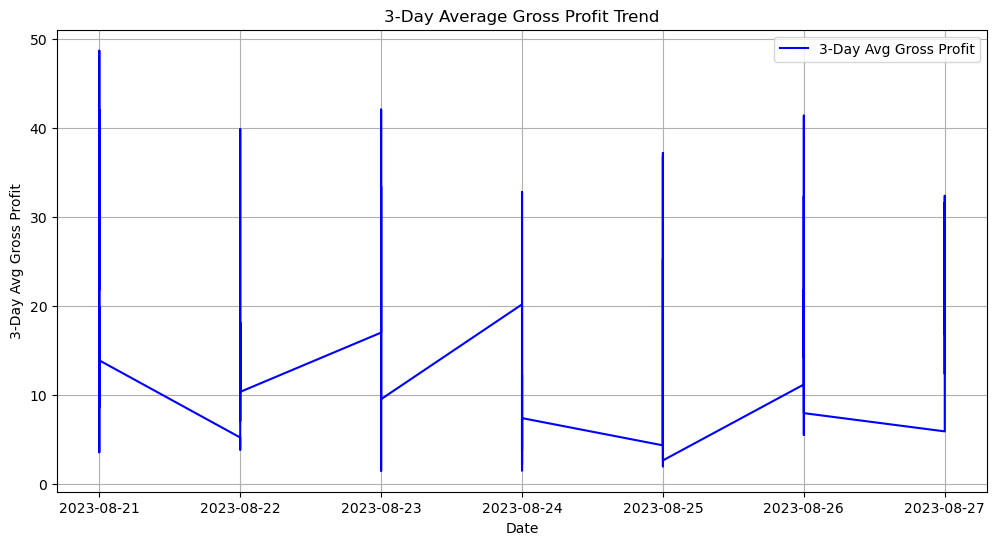

In [14]:
#7.Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.


import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data2 = pd.read_csv('sales_data_2.csv')

# Convert the 'Date' column to a datetime object
data2['Date'] = pd.to_datetime(data2['Date'])

# Calculate the 3-day rolling average of Gross Profit
data2['3-Day Avg Gross Profit'] = data2['Selling price'] - data2['Buying price']

# Create a line plot to visualize the 3-day average trend
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit', color='blue')
plt.title('3-Day Average Gross Profit Trend')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
#8.Can you optimize the sales process to ensure gross margin is maximized?
    #1. Would you fire any vendor?
    #2. Would you let go of any customer?
    
    
    1.Since vendor 8 has gross margin of 253 it may be considered.But still it gives profit 
    2.No,SD of the customer is quit impressive there is no outlier so no need of letting go customer
    

In [11]:
'''#9.To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market.
Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?'''

percentiles = data2[['Buying price', 'Selling price']].quantile([0.25, 0.5, 0.75])
print("Percentiles for Buying Price (Cost):")
print(percentiles['Buying price'])
print("\nPercentiles for Selling Price (Price):")
print(percentiles['Selling price'])


Percentiles for Buying Price (Cost):
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

Percentiles for Selling Price (Price):
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [12]:
'''#10.Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile,
potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.'''


import pandas as pd

# Load the data
data2 = pd.read_csv('sales_data_2.csv')

# Calculate the 25th and 75th percentiles for Buying Price (Cost)
cost_25th_percentile = data2['Buying price'].quantile(0.25)
cost_75th_percentile = data2['Buying price'].quantile(0.75)

# Calculate the number of transactions where Cost is below the 25th percentile
below_25th_percentile_cost = len(data2[data2['Buying price'] < cost_25th_percentile])

# Calculate the number of transactions where Cost is above the 75th percentile
above_75th_percentile_cost = len(data2[data2['Buying price'] > cost_75th_percentile])

# Calculate the 25th and 75th percentiles for Selling Price (Price)
price_25th_percentile = data2['Selling price'].quantile(0.25)
price_75th_percentile = data2['Selling price'].quantile(0.75)

# Calculate the number of transactions where Price is below the 25th percentile
below_25th_percentile_price = len(data2[data2['Selling price'] < price_25th_percentile])

# Calculate the number of transactions where Price is above the 75th percentile
above_75th_percentile_price = len(data2[data2['Selling price'] > price_75th_percentile])

# Display the results
print("Buying Price (Cost) Analysis:")
print(f"Number of transactions below 25th percentile Cost: {below_25th_percentile_cost}")
print(f"Number of transactions above 75th percentile Cost: {above_75th_percentile_cost}")

print("\nSelling Price (Price) Analysis:")
print(f"Number of transactions below 25th percentile Price: {below_25th_percentile_price}")
print(f"Number of transactions above 75th percentile Price: {above_75th_percentile_price}")


Buying Price (Cost) Analysis:
Number of transactions below 25th percentile Cost: 18
Number of transactions above 75th percentile Cost: 18

Selling Price (Price) Analysis:
Number of transactions below 25th percentile Price: 18
Number of transactions above 75th percentile Price: 18


In [59]:
#11.Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

#Vendor 4 occupies the number 1 position in total gross margin.It can be honored



# Load the data
data = pd.read_csv('sales_data_2.csv')

# Calculate the gross margin with Vendor 4's contributions
with_vendor_4 = data[data['Firm bought from'] == 'Vendor 4']
gross_margin_with_vendor_4 = ((with_vendor_4['Selling price'] - with_vendor_4['Buying price']) * with_vendor_4['Quantity sold']).sum()

# Calculate the gross margin without Vendor 4's contributions
without_vendor_4 = data[data['Firm bought from'] != 'Vendor 4']
gross_margin_without_vendor_4 = ((without_vendor_4['Selling price'] - without_vendor_4['Buying price']) * without_vendor_4['Quantity sold']).sum()

# Calculate the impact on the gross margin
impact_on_gross_margin = gross_margin_with_vendor_4 - gross_margin_without_vendor_4

print(f"Impact on Gross Margin by Honoring Vendor 4: {impact_on_gross_margin:.2f}")



Impact on Gross Margin by Honoring Vendor 4: -31482.75


In [58]:
#12. Which vendor should we have a strategic tie up so that we source only from them the goal here is to have the highest
#gross margin) What’s the theoretical max margin the firm could have from that branch?

import pandas as pd

# Load the dataset
data = pd.read_csv('sales_data_2.csv')

# Calculate gross margin for each vendor
data['Gross Margin'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

# Group data by vendor and calculate the total gross margin for each vendor
vendor_gross_margin = data.groupby('Firm bought from')['Gross Margin'].sum()

# Find the vendor with the most gross margin
most_profitable_vendor = vendor_gross_margin.idxmax()

# Calculate the theoretical max margin the firm could have from that branch
theoretical_max_margin = vendor_gross_margin.max()

print(f"The vendor with the most gross margin is: {most_profitable_vendor}")
print(f"The theoretical max margin from that branch is: {theoretical_max_margin:.2f}")



The vendor with the most gross margin is: Vendor4
The theoretical max margin from that branch is: 6903.31


In [46]:
#13.Given this is the ground truth, what is the price elasticity of Sapota for that branch?
#(If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

# Calculate the initial total sales
initial_total_sales = data2['Quantity sold'].sum()

# Increase the price by Rs. 1 and calculate total sales
data2['Selling price'] += 1
new_total_sales_up = data2['Quantity sold'].sum()

# Decrease the price by Rs. 1 and calculate total sales
data2['Selling price'] -= 2  # Decrease by Rs. 1
new_total_sales_down = data2['Quantity sold'].sum()

# Calculate the percentage changes
percentage_change_price = 1  # Rs. 1 change
percentage_change_sales_up = (new_total_sales_up - initial_total_sales) / initial_total_sales
percentage_change_sales_down = (new_total_sales_down - initial_total_sales) / initial_total_sales

# Calculate the price elasticity
price_elasticity_up = percentage_change_sales_up / percentage_change_price
price_elasticity_down = percentage_change_sales_down / percentage_change_price

print(f"Price Elasticity (Increase by Rs. 1): {price_elasticity_up}")
print(f"Price Elasticity (Decrease by Rs. 1): {price_elasticity_down}")


Price Elasticity (Increase by Rs. 1): 0.0
Price Elasticity (Decrease by Rs. 1): 0.0
